# **Quiz Pekan - 3**

# Soal 1 : Apakah harapan kalian saat mengikuti kelas Python Datascience dasar? 

Jawab:


Saya berharap bisa menguasai materi python khususnya memperdalam materi berkaitan dengan Machine Learning

---



---




## **Penjelasan Dataset**
Dataset-dataset berikut ini menunjukkan score happines dunia. Score happiness menggunakan data dari GallUp world poll. Data feature yang menjadi kata kunci di report ini adalah:

*  **Life Ladder** >> Ibarat sebuah tangga, pijakan 0 adalah dasar dan 10 adalah atas. Tangga atas menunjukkan  kehidupan terbaik  dan dasar tangga menunjukkan kehidupan terburuk 
*   **Log GDP Per capita** >> nilai ekonomi yang dihasilkan setiap individu warga
*  **Social support**  >> dukungan sosial seperti keluarga, teman, tetangga dll
*   **Healthy life expectancy at birth** >> rata-rata hidup dalam kesehatan yang baik
*   **Freedom to make life choices** >> Peluang tiap individu untuk melakukan aksi yang dipilih
*   **Generosity** >> Kemurahan hati
*  **Perceptions of corruption**  >> Korupsi


Link Download:

[world-happiness-report.csv](https://drive.google.com/uc?export=download&id=14yujHboPMR5tc_n3btPcFW4fXgy4-SzL)

[world-happiness-report-2021.csv](https://drive.google.com/uc?export=download&id=1gWCX58PyH0viABEMswzJ71sJ0v5KHco3)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Mounted at /content/drive


In [8]:
#import semua data

df1 = pd.read_csv('/content/drive/MyDrive/PKS DIgital School/world-happiness-report.csv')
df2 = pd.read_csv('/content/drive/MyDrive/PKS DIgital School/world-happiness-report-2021.csv')

# Soal 2 : Tunjukkan summary statistik dari dataset world happiness 2021 seperti expected output berikut. 



*   Tunjukkan summary statistik dari dataset df2



HINT:
Teman-teman perlu mendrop beberapa kolom yang tidak ditampilkan di tabel expected output dengan menggunakan atribut .drop() dari pandas DataFrame. Silahkan kunjungi referensi link berikut:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [9]:
#code here
# Drop kolom yang tidak ingin ditampilkan
columns = df2.columns
print(columns)
columns_to_drop = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
df2_dropped = df2.drop(columns_to_drop, axis=1)


summary_stats = df2_dropped.describe()
print(summary_stats)

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')
       Standard error of ladder score  upperwhisker  lowerwhisker  \
count                      149.000000    149.000000    149.000000   
mean                         0.058752      5.648007      5.417631   
std                          0.022001      1.054330      1.094879   
min                          0.026000      2.596000      2.449000   
25%                 

Expected output:

![Expected Output:](https://drive.google.com/uc?id=1wvMxczKvP94GTAGTWmjoBydNOkK0OqU2)



---



---



# Soal 3: Happiness report negara Indonesia dari tahun 2006 - 2021

Output yang diharapkan adalah data negara Indonesia dari penggabungan dataset happiness report dan dataset happiness report 2021. Untuk sesuai dengan expected ouput, lakukan perintah-perintah berikut:


1.   Lakukan filtering dataset happiness report dari kolom ['Country name']== 
'Indonesia'
        - tambahkan atribut .reset_index(drop=True)
        - drop kolom 'Positive affect' dan 'Negative affect'

2.   Lakukan filtering dataset dari variabel no 2 (hasil dropping beberapa kolom sebelumnya)
        - tambahkan kolom ['year']=2021 pada dataset dari variabel no 2 (hasil dropping beberapa kolom)
        - filtering dataset tersebut menggunakan kolom ['Country name']== 
'Indonesia'
        - rename beberapa kolom dengan menggunakan atribut .rename() dari pandas, referensi dokumentasi : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
                {      
               'Ladder score':'Life Ladder',
               'Logged GDP per capita':'Log GDP per capita',
                'Healthy life expectancy':'Healthy life expectancy at birth'}

        - drop kolom 'Dystopia + residual' dan 'Regional indicator'

3. Gabungkan data dari hasil poin 1 dan poin 2
    -  gunakan pandas concat, .concat()
    - tambahkan atribut .reset_index(drop=True)
    - rename kolom {'year':'Year'}


In [19]:
# columns = df1.columns
# print(columns)
# # Filtering dataset happiness report
df_happiness_report_filtered = df1[df1['Country name'] == 'Indonesia'].reset_index(drop=True)
df_happiness_report_filtered = df_happiness_report_filtered.drop(['Positive affect', 'Negative affect'], axis=1)
df_happiness_report_filtered
# # Filtering dataset hasil dropping kolom sebelumnya
df_filtered_dropped_cols = df2_dropped[df2_dropped['Country name'] == 'Indonesia']
df_filtered_dropped_cols['Year'] = 2021

# # Rename kolom pada dataset hasil filtering
rename_cols = {
    'Ladder score': 'Life Ladder',
    'Logged GDP per capita': 'Log GDP per capita',
    'Healthy life expectancy': 'Healthy life expectancy at birth'
}
df_filtered_dropped_cols = df_filtered_dropped_cols.rename(columns=rename_cols)
df_filtered_dropped_cols = df_filtered_dropped_cols.drop(['Dystopia + residual', 'Regional indicator'], axis=1)
df_filtered_dropped_cols
# # Gabungkan kedua dataset
df_combined = pd.concat([df_happiness_report_filtered, df_filtered_dropped_cols]).reset_index(drop=True)
df_combined = df_combined.rename(columns={'year': 'Year'})
df_combined

<ipython-input-19-432c408cffc3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_dropped_cols['Year'] = 2021


,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Standard error of ladder score,upperwhisker,lowerwhisker,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Year
0,Indonesia,2006.0,4.947,8.850,0.771,59.84,0.713,0.347,0.915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Indonesia,2007.0,5.101,8.898,0.704,59.98,0.603,0.311,0.960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indonesia,2008.0,4.815,8.943,0.675,60.12,0.596,0.164,0.968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Indonesia,2009.0,5.472,8.975,0.779,60.26,0.784,0.191,0.911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Indonesia,2010.0,5.457,9.022,0.816,60.40,0.700,0.448,0.954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Indonesia,2011.0,5.173,9.069,0.825,60.62,0.878,0.438,0.962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Indonesia,2012.0,5.368,9.114,0.834,60.84,0.770,0.354,0.962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Indonesia,2013.0,5.292,9.155,0.794,61.06,0.781,0.376,0.973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Indonesia,2014.0,5.597,9.190,0.905,61.28,0.719,0.408,0.970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Indonesia,2015.0,5.043,9.225,0.809,61.50,0.779,0.471,0.946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Expected output:

![Expected Output:](https://drive.google.com/uc?id=1FRTJ03i_khNOWeIeEGaAOSsurwKlZ8ex)



---



---



# Soal 4: Visualisasi lineplot Life Ladder negara Indonesia

*   Gunakan library seaborn untuk plotting line plot kolom Life Ladder dari hasil penggabungan negara Indonesia tahun 2006-2021 (soal 3) seperti expected output, jika tidak bisa menyelesaikan soal 3 silahkan download data berikut 
[Download.csv](https://drive.google.com/uc?export=download&id=19g5oURnRNlbXPUEQQyvimoEx8DwqMPLW) 
*   Berikan insight dari hasil visualisasi tersebut

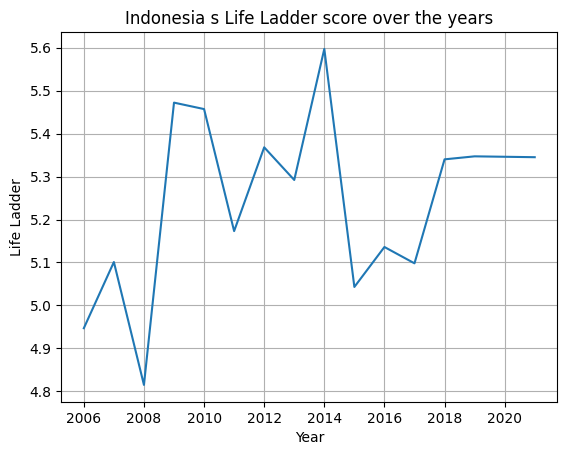

In [25]:
#code here
df = pd.read_csv('/content/drive/MyDrive/PKS DIgital School/indonesia.csv')
df
# Filter data untuk negara Indonesia dan tahun 2006-2021
# df_indonesia = df_combined[(df_combined['Country name'] == 'Indonesia') & (df_combined['Year'] >= 2006)]

# # Plot line plot kolom 'Life Ladder'
sns.lineplot(data=df, x='Year', y='Life Ladder')

# # Menampilkan plot
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.title('Indonesia s Life Ladder score over the years')
plt.grid()
plt.show()


Expected output:

![Expected Output:](https://drive.google.com/uc?id=16Qlf66XYLNSGtJpCx1hWkQI0CmffaaGW)

#### Berikan insight disini:

Tingakat kebahagian masyarakat indonesia bisa dikatakan meningkat. pada tahun 2008 hingga 2020 rata-rata kebahagiaan masyarakat Indonesia dikatakan lebih tingg dari pada tahun 2006 hingga 2008

---



---



# Soal 5: Urutkan Ladder Score tertinggi dengan negara-negara Asia Tenggara seperti expected output

Untuk mendapatkan expected output, lakukan perintah-perintah berikut:

*   Sorting data berdasarkan kolom 'Ladder Score' dari dataset world happiness 2021 dengan hanya menampilkan kolom ['Country name', 'Ladder score', 'Regional indicator']. Sorting data menggunakan sort_values() dari pandas, silahkan kunjungi dokumentasi berikut: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
*   Urutan pertama diperoleh dari hasil filtering dengan kondisi ['Ladder score']==['Ladder score'].max()

*   Urutan negara-negara Asia tenggara diperoleh dari hasil Filtering kolom ['Regional indicator'] == 'Southeast Asia'
*   Lakukan concatination antara data Urutan pertama dengan urutan negara Asia Tenggara menggunakan pd.concat()
*   Tambahkan kolom ['Rank'] yang berisi dari indeks hasil penggabungan
*   drop kolom 'Regional indicator'


In [27]:
# Filter data dengan kondisi Ladder score == Ladder score terbesar
max_score = df2[df2['Ladder score'] == df2['Ladder score'].max()]

# Filter negara-negara Asia Tenggara
southeast_asia = df2[df2['Regional indicator'] == 'Southeast Asia']

# Sorting data berdasarkan kolom Ladder score
sorted_data = pd.concat([max_score, southeast_asia]).sort_values('Ladder score', ascending=False)

# Tambahkan kolom Rank berdasarkan indeks hasil penggabungan
sorted_data['Rank'] = range(1, len(sorted_data) + 1)

# Drop kolom 'Regional indicator'
sorted_data = sorted_data.drop('Regional indicator', axis=1)

# Tampilkan data
print(sorted_data[['Country name', 'Ladder score', 'Rank']])


    Country name  Ladder score  Rank
0        Finland         7.842     1
31     Singapore         6.377     2
53      Thailand         5.985     3
60   Philippines         5.880     4
78       Vietnam         5.411     5
80      Malaysia         5.384     6
81     Indonesia         5.345     7
99          Laos         5.030     8
113     Cambodia         4.830     9
125      Myanmar         4.426    10


Expected output:

![Expected Output:](https://drive.google.com/uc?id=1JTwA9auco2loNLRXHQFy0k6EpFhJeqA5)

Bagaimana Rank Ladder score negara Indonesia jika dibandingkan dengan negara asean lainnya dan secara global?

jawab disini:

Bisa dikatakan tingkat kebahagiaan rakyat indonesia tergolong rendah dari pada negara-negara di Asia Tenggara lainnya

---



---



# Soal 6: Visualisasi Scatter plot dan Regression plot

Buatlah visualisasi scatter plot (perpaduan seaborn dan matplotlib), Scatter plot menggunakan Matplotlib dan regresi plot menggunakan Seaborn dari df2 antara GDP per capita ('Logged GDP per capita') dan  skor korupsi ('Perceptions of corruptions')  sesuai expected output dengan ketentuan berikut:

Gunakan kolom skor kebebasan beraksi ('Freedom to make life choices') sebagai ukuran pointnya kalikan suatu angka yang cukup besar agar terlihat.

Gunakan kolom skor kesehatan ('Healthy life expectancy') sebagai warna point, berikan cmap 'plasma'.

Gunakan regplot pada seaborn (sns.regplot) dengan argumen scatter=False dan color = 'black'

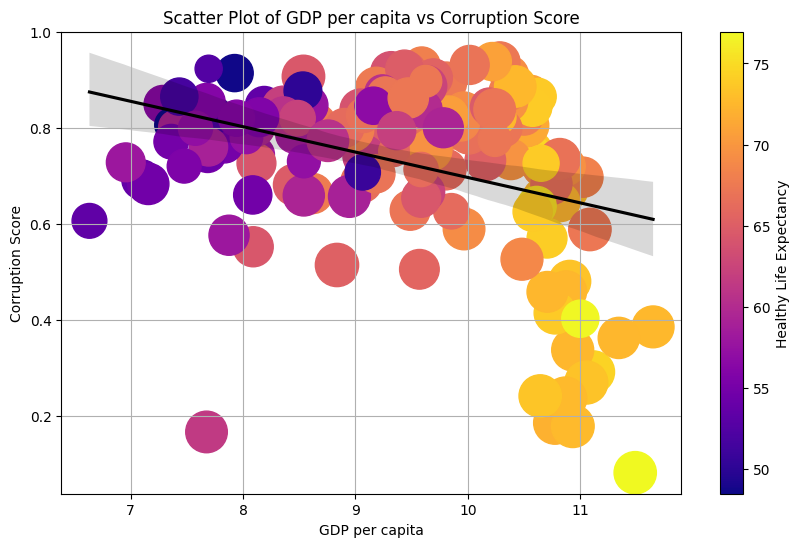

In [29]:
#code here
# Scatter plot
plt.figure(figsize=(10, 6))
scatter_size = df2['Freedom to make life choices'] * 1000  # Menggunakan kolom 'Freedom to make life choices' sebagai ukuran point
scatter_color = df2['Healthy life expectancy']  # Menggunakan kolom 'Healthy life expectancy' sebagai warna point

# Scatter plot dengan ukuran dan warna yang ditentukan
plt.scatter(df2['Logged GDP per capita'], df2['Perceptions of corruption'], s=scatter_size, c=scatter_color, cmap='plasma')

# Regresi plot menggunakan seaborn
sns.regplot(x=df2['Logged GDP per capita'], y=df2['Perceptions of corruption'], scatter=False, color='black')

# Label dan judul plot
plt.xlabel('GDP per capita')
plt.ylabel('Corruption Score')
plt.title('Scatter Plot of GDP per capita vs Corruption Score')

# Menampilkan colorbar untuk memperjelas korelasi antara warna dan skor kesehatan
cbar = plt.colorbar()
cbar.set_label('Healthy Life Expectancy')

# Menampilkan plot
plt.grid()
plt.show()

Expected output:

![Expected Output:](https://drive.google.com/uc?id=1KlQcNK6RNMNGoRkxwo4KPUgX40efZH7a)

Berikan insight dari hasil visualisasi diatas!

Jawab disini:
rata-rata hidup dalam kesehatan yang baik berbanding lurus dengan  GPD per kapita dan berbanding terbalik dengan persentasi korupsi. Jika rasio antara GPD per kapita dengan persentasi korupsi tinggi maka rata-rata hidup dalam kesehatan bernilai baik,Jika rasio antara GPD per kapita dengan persentasi korupsi rendah maka rata-rata hidup dalam kesehatan bernilai buruk.



---



---

